In [0]:
pip install tesseract

In [0]:
! apt install tesseract-ocr

In [5]:
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libleptonica-dev
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,755 kB of archives.
After this operation, 13.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Fetched 2,755 kB in 3s (1,010 kB/s)
Selecting previously unselected package libleptonica-dev.
(Reading database ... 144476 files and directories currently installed.)
Preparing to unpack .../libleptonica-dev_1.75.3-3_amd64.deb ...
Unpacking libleptonica-dev (1.75.3-3) ...
Selecting previously unselected package libtesseract-dev.
Preparing to unpack .../libte

In [0]:
! pip install Pillow


In [0]:
! pip install pytesseract

In [0]:
import pytesseract


In [0]:
import pickle as pkl

In [0]:
!python -m spacy download en_core_web_lg

In [0]:
import matplotlib.pyplot as plt
import spacy
import cv2
import pytesseract

loading and reading image by Pytesseract

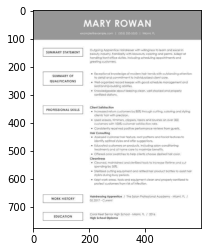

In [293]:
img=cv2.imread("/content/drive/My Drive/T1.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
text=pytesseract.image_to_string(img)

For Testing the model I used plain text .    
The model worked perfectly for good quality images


In [0]:
#text="Donald John Trump (born June 14, 1946) is the 45th and current president of the United States. Before entering politics, he was a businessman and television personalityHe appointed Neil Gorsuch and Brett Kavanaugh to the Supreme Court. In foreign policy, Trump has pursued an America First agenda, withdrawing the U.S. from the Trans-Pacific Partnership trade negotiations, the Paris Agreement on climate change, and the Iran nuclear deal. During increased tensions with Iran, he ordered the killing of Iranian general Qasem Soleimani. He imposed import tariffs triggering a trade war with China, recognized Jerusalem as the capital of Israel, and withdrew U.S. troops from northern Syria to avoid Turkey's offensive on American-allied Kurds."

In [0]:
nlp=spacy.load("en_core_web_lg")

In [0]:
text=text.title().strip()



In [0]:
data=nlp(text)



In [291]:
data

Donald John Trump (Born June 14, 1946) Is The 45Th And Current President Of The United States. Before Entering Politics, He Was A Businessman And Television Personalityhe Appointed Neil Gorsuch And Brett Kavanaugh To The Supreme Court. In Foreign Policy, Trump Has Pursued An America First Agenda, Withdrawing The U.S. From The Trans-Pacific Partnership Trade Negotiations, The Paris Agreement On Climate Change, And The Iran Nuclear Deal. During Increased Tensions With Iran, He Ordered The Killing Of Iranian General Qasem Soleimani. He Imposed Import Tariffs Triggering A Trade War With China, Recognized Jerusalem As The Capital Of Israel, And Withdrew U.S. Troops From Northern Syria To Avoid Turkey'S Offensive On American-Allied Kurds.

In [0]:
person_entities = [ent for ent in data.ents if ent.label_ == "PERSON"]

In [273]:
person_entities

[Donald John Trump, Neil Gorsuch, Brett Kavanaugh, Trump, Qasem Soleimani]

In [0]:
only_alpha = ""
new_person=[]
## looping through the string to find out alphabets
for string in person_entities:
  string=str(string)
  for char in range(0,len(string)):
   

    if ord(string[char]) >= 65 and ord(string[char]) <= 90:
      only_alpha += string[char]
    ## checking for lower case
    elif ord(string[char]) >= 97 and ord(string[char]) <= 122:
      only_alpha += string[char]
    elif ord(string[char])==32:
      only_alpha+=string[char]

  ## printing the string which contains only alphabets
  if only_alpha[-1]==' ':
    new_person.append(only_alpha[:-1])
  else:
    new_person.append(only_alpha)
  only_alpha=''

In [275]:
new_person

['Donald John Trump',
 'Neil Gorsuch',
 'Brett Kavanaugh',
 'Trump',
 'Qasem Soleimani']

In [0]:
file=open("/content/drive/My Drive/first_names.all.txt","r",encoding='utf-8')


In [277]:
first=file.read()
first_name=first.split("\n")
first_name=first_name[:-1]
file.close

<function TextIOWrapper.close>

In [0]:
first_name.extend(["aisha",
 "aishah",
 'ajay',
 "aisha",
 "aishah"])

In [0]:
lis=[]
first_name_dic={}
for i in range(len(first_name)-2):
  
  if first_name[i][0]=='a' and first_name[i][1]=="a":
    lis.append(first_name[i][1:])
first_name.extend(lis)
  

In [0]:
for i in first_name:
  first_name_dic[i]="FNAME"

In [281]:
first_name_dic['penne']

'FNAME'

In [0]:
string_entity=[ent+" is president of india" for ent in new_person]

In [283]:
string_entity

['Donald John Trump is president of india',
 'Neil Gorsuch is president of india',
 'Brett Kavanaugh is president of india',
 'Trump is president of india',
 'Qasem Soleimani is president of india']

In [0]:
redefined_ents=[]
for sent in string_entity:
  doc=nlp(sent)
  for ent in doc.ents:
    if ent.label_=="PERSON":
      redefined_ents.append(ent.text)

In [285]:
for i in redefined_ents:
  print(i)

Donald John Trump
Neil Gorsuch
Brett Kavanaugh
Qasem Soleimani


In [286]:
confirm_names=[]

for name in redefined_ents:
  lis=name.split()
  
  if str.lower(lis[0]) in first_name_dic:
    print("name confirmed: ",name)
  

name confirmed:  Donald John Trump
name confirmed:  Neil Gorsuch
name confirmed:  Brett Kavanaugh
name confirmed:  Qasem Soleimani
